# Load Packages

In [1]:
# scikit-learn, scikit-image are needed
# If those packages are missed, then, install them by using the following command
# pip install scikit-learn scikit-image

import os

import sklearn.datasets
import sklearn.linear_model
import sklearn.svm
import sklearn.tree
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics

import skimage.io
import skimage.transform
import skimage.color

import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

# Load Additional Packages (if you want to use other modules in Scikit Learn)

In [2]:
# Load additional scikit learn packages! if you need
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Load Data Points (Do not modify the following block)

In [3]:
image_size = 64
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

images = []
y = []
for i in labels:
    folderPath = os.path.join('./tumor_dataset/Training',i)
    for j in os.listdir(folderPath):
        img = skimage.io.imread(os.path.join(folderPath,j),)
        img = skimage.transform.resize(img,(image_size,image_size))
        img = skimage.color.rgb2gray(img)
        images.append(img)
        y.append(i)
        
images = np.array(images)

X = images.reshape((-1, image_size**2))
y = np.array(y)

In [ ]:
image_size = 64
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

images1 = []
y1 = []

for h in labels:
    folderPath = os.path.join('./tumor_dataset/Testing',h)
    for x in os.listdir(folderPath):
        img1 = skimage.io.imread(os.path.join(folderPath,x),)
        img1 = skimage.transform.resize(img1,(image_size,image_size))
        img1 = skimage.color.rgb2gray(img1)
        images1.append(img1)
        y1.append(h)

images1 = np.array(images1)

X1_test = images1.reshape((-1, image_size**2))
y1_test = np.array(y1)

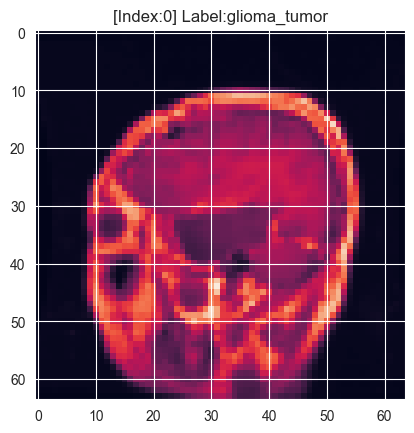

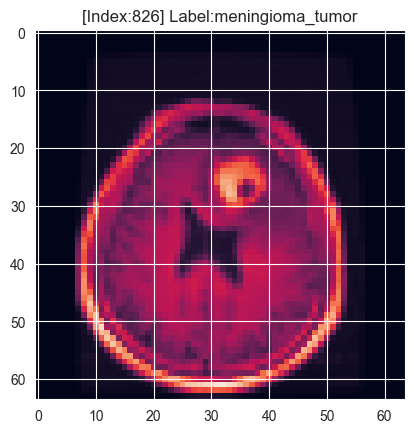

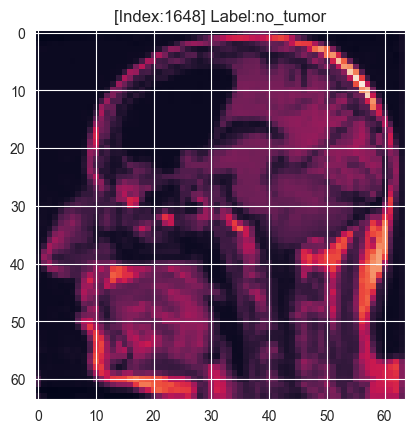

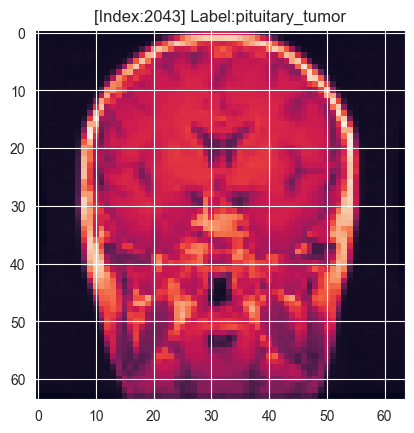

In [5]:
j = 0
for i in range(len(y)):
    if y[i] in labels[j]:
        plt.imshow(images[i])
        plt.title("[Index:{}] Label:{}".format(i, y[i]))
        plt.show()
        j += 1
    if j >= len(labels):
        break

In [6]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.01, random_state=0)

# Classification with Scikit Learn Library (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'X_train' is feature vectors of training dataset
- 'y_train' is target labels of training dataset
- 'X_test' is feature vectors of test dataset
- 'y_test' is target labels of test dataset
- 'y_pred' was initialized as zero vectors and fill 'y_pred' with predicted labels

### Find the best model and hyperparameter for face recognition

In [20]:
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf2 = KNeighborsClassifier(n_neighbors=1)
knn_clf3 = KNeighborsClassifier(n_neighbors=1)
svc_clf = SVC(kernel='rbf', C=10, coef0=5,degree=9,gamma=1.2,probability=True)
svc_clf1 = SVC(kernel='rbf', C=10, coef0=5,degree=9,gamma=1.1,probability=True)
svc_clf2 = SVC(kernel='rbf', C=10, coef0=5,degree=9,gamma=1.1,probability=True)
svc_clf3 = SVC(kernel='rbf', C=10, coef0=5,degree=10,gamma=1.0,probability=True)
xtree_clf = ExtraTreesClassifier(n_estimators=3, random_state=869,criterion='entropy')
xtree_clf1 = ExtraTreesClassifier(n_estimators=3, random_state=9285,criterion='entropy')
mlp_gs = MLPClassifier(max_iter=30000,solver='lbfgs',random_state=0, hidden_layer_sizes=[10,5,10,2])
mlp_gs2 = MLPClassifier(max_iter=30000,solver='lbfgs',random_state=0, hidden_layer_sizes=[10,5,10,2])

vote = VotingClassifier(estimators=[('KNN',knn_clf),('KNN2',knn_clf2),('KNN3',knn_clf3),('svc',svc_clf),('svc1',svc_clf1),('svc2',svc_clf2),('svc3',svc_clf3),('XTree',xtree_clf),('XTree1',xtree_clf1), ('MLP', mlp_gs), ('MLP2', mlp_gs2)])

vote.fit(X_train, y_train)
y_pred = vote.predict(X_test)

### Print accuracy (do not modify the following block)

In [34]:
print('Accuracy: %.2f' % sklearn.metrics.accuracy_score(y1_test, y_pred))

Accuracy: 0.91
